In [10]:
pip install tweepy

You should consider upgrading via the '/Users/ekaterinaossetchkina/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install requests

You should consider upgrading via the '/Users/ekaterinaossetchkina/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [98]:
import tweepy
import time
import pandas as pd
import json
from datetime import datetime

In [99]:
# Import 3rd party libraries, os (directory services), pandas (data manipulation), seaborn and matplotlib (for visualization)
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [100]:
#new app
consumer_api_key = 'c5chcYjAYVYOz5ryGruYg1Vki'
consumer_api_secret = 'fpTt68oyv0hzBPthYo9RVNp44mEqmoe2gWxh664qgLkfzPJjt9'

In [102]:
callback_uri = 'oob' #

auth = tweepy.OAuthHandler(consumer_api_key,consumer_api_secret, callback_uri) #OAuth = standardized login into twitter server
redirect_url = auth.get_authorization_url() #get a URL can send twitter user to
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=7xZujgAAAAABbYS0AAABgCu2DVM


In [103]:
#update your pin into the variable user_pin below, as a string
user_pin = input('Provide your user pin from the link: ')
user_pin

Provide your user pin from the link: 8514124


'8514124'

In [34]:
#retrieve access keys for the user, these do not change
#note: this cell can only be run once, otherwise a new pin must be retreived for security reasons
auth.get_access_token(user_pin)

('1493257684451307533-JEIHy2UyGheRP2M51tz0miYjDs3Rab',
 'aFYKaneRXaqRpfFJck6US3R0VE1PSHIPRp657aAWvvovo')

In [35]:
#gives access to everything in the twitter API
api = tweepy.API(auth)

## Get list of tweets tagging @TO_WinterOps account

In [104]:
# Search full archive - searching from January start to end of March 2022
#note: there is a maximum of 100 tweets retreived with each API call
tweets_3_months = api.search_full_archive(label='dev', 
                           query='@TO_WinterOps',
                           fromDate="202201010000", 
                           toDate = "202203310000",
                           maxResults = 100
                           )

In [105]:
tweets_3_months

[Status(_api=<tweepy.api.API object at 0x7fe4cb917400>, _json={'created_at': 'Wed Mar 30 16:00:35 +0000 2022', 'id': 1509198916096561154, 'id_str': '1509198916096561154', 'text': 'RT @TO_WinterOps: Expressways, major roads, residential roads and trails are being salted where required.  #CityofTOWinterAlert @311Toronto', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 238984493, 'id_str': '238984493', 'name': 'TO Transportation', 'screen_name': 'TO_Transport', 'location': 'Toronto, Ontario, Canada', 'url': 'http://www.toronto.ca/transportation', 'description': 'Gateway to City of Toronto Transportation Services on Twitter. Please note, we do not provide responses at this account. Terms of Use: http://bit.ly/2CBLczr', 'translator_type': 'none', 'protected': F

In [169]:
# To get a meaningful output, use this loop to print the first 5 entries:
for info in tweets_3_months[:5]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.text)
     print(info.entities)
     print(info.user.screen_name)
     print(info.user.id)
     print("\n")

ID: 1482783656792018946
2022-01-16 18:35:47+00:00
RT @clairejoswald: Applying salt brine before a snowfall is a good way to reduce overall road salt application rates. Good luck with this s…
{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'clairejoswald', 'name': 'Dr. Claire J. Oswald', 'id': 930466742, 'id_str': '930466742', 'indices': [3, 17]}], 'symbols': []}
LostRiversTO
778920158


ID: 1482766485181370369
2022-01-16 17:27:33+00:00
Applying salt brine before a snowfall is a good way to reduce overall road salt application rates. Good luck with t… https://t.co/OsMtswoqIx
{'hashtags': [], 'urls': [{'url': 'https://t.co/OsMtswoqIx', 'expanded_url': 'https://twitter.com/i/web/status/1482766485181370369', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}], 'user_mentions': [], 'symbols': []}
clairejoswald
930466742


ID: 1482738550709784581
2022-01-16 15:36:33+00:00
@markhmills @cityoftoronto @JohnTory @TO_WinterOps @TO_Transport Is it electric?
{'hasht

In [170]:
#Due to the 100 Tweet pull, we did not pull all the way back to January. The minimum date can be found like so:
min_date = (str(tweets_3_months[-1].created_at)[0:10]).replace('-','')+'0000'
print(min_date)

202201010000


In [ ]:
# To download all tweets, not just the last 100: 
tweets_3_months = api.search_full_archive(label='dev', 
                           query='@TO_WinterOps',
                           fromDate="202201010000", 
                           toDate = "202203310000",
                           maxResults = 100
                           )

all_mentions = []
all_mentions.extend(tweets_3_months)
while True:
    tweets_3_months = api.search_full_archive(label='dev', 
                           query='@TO_WinterOps',
                           fromDate="202201010000", 
                           toDate = min_date,
                           maxResults = 100
                           )
    if len(tweets_3_months) == 0:
        break
        
    min_date = (str(tweets_3_months[-1].created_at)[0:10]).replace('-','')+'0000'
    print(min_date)
    all_mentions.extend(tweets_3_months)
    print('Number of tweets in all_mentions dataframe: {}'.format(len(all_mentions)))

#The loop will break when either the length of a new API pull has zero tweets, or when the toDate equals the fromDate

In [172]:
from pandas import DataFrame

mentions_tweets = [[ info.id, 
              info.created_at, 
              info.favorite_count, 
              info.retweet_count, 
              info.text.encode("utf-8").decode("utf-8"),
              info.entities,
              info.user.screen_name] 
             for idx,info in enumerate(all_mentions)]
mentions_df = DataFrame(mentions_tweets,columns=["id","created_at","favorite_count","retweet_count", "text", "entities","screen_name"])
mentions_df.head()

,id,created_at,favorite_count,retweet_count,text,entities,screen_name
0,1509198916096561154,2022-03-30 16:00:35+00:00,0,0,"RT @TO_WinterOps: Expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport
1,1509193716531175428,2022-03-30 15:39:56+00:00,0,0,@311Toronto @IndiainToronto @TO_WinterOps awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi
2,1508849662442323980,2022-03-29 16:52:47+00:00,0,0,@cath_devries This was the ONE major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2
3,1508176549899550729,2022-03-27 20:18:04+00:00,0,0,"RT @TO_WinterOps: All expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling
4,1508108574777614347,2022-03-27 15:47:58+00:00,0,0,"RT @TO_WinterOps: All expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div


Now all the tweets are in the dataframe. Note, that with the Elevated Academic license, when using the Full Archive Search API twitter will limit the number of characters in the tweet (showing 180 characters out of the possible 280 limit). 

To retrieve the full tweet text, an Enterprise paid license is required, which was not done for this project.

In [223]:
#to follow along with the code, the dataframe will be saved to a separate file all_mentions.csv
mentions_df.to_csv('src/Twitter Data/mentions.csv')

mentions_df = pd.read_csv('src/Twitter Data/mentions.csv')
mentions_df.head()

,id,created_at,favorite_count,retweet_count,text,entities,screen_name
0,1.509200e+18,2022-03-30 16:00:35+00:00,0,0,"rt @to_winterops: expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport
1,1.509190e+18,2022-03-30 15:39:56+00:00,0,0,@311toronto @indiaintoronto @to_winterops awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi
2,1.508850e+18,2022-03-29 16:52:47+00:00,0,0,@cath_devries this was the one major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2
3,1.508180e+18,2022-03-27 20:18:04+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling
4,1.508110e+18,2022-03-27 15:47:58+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div


In [225]:
#Data-frame cleanup and date-time localization
mentions_df = mentions_df.drop_duplicates(subset=['id'])
mentions_df['datetime_utc'] = pd.to_datetime(mentions_df['created_at'],utc=True)
mentions_df['datetime_est'] = mentions_df['datetime_utc'].dt.tz_convert('US/Eastern')

In [240]:
mentions_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 342 entries, 1.5092e+18 to 1.47711e+18
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   created_at        342 non-null    object                    
 1   favorite_count    342 non-null    int64                     
 2   retweet_count     342 non-null    int64                     
 3   text              342 non-null    object                    
 4   entities          342 non-null    object                    
 5   screen_name       342 non-null    object                    
 6   datetime_utc      342 non-null    datetime64[ns, UTC]       
 7   datetime_est      342 non-null    datetime64[ns, US/Eastern]
 8   text_no_punc      342 non-null    object                    
 9   polarity          342 non-null    float64                   
 10  datetime_rounded  342 non-null    datetime64[ns, US/Eastern]
 11  final_polarit

## Preparing dataframe for sentiment analysis

In [226]:
mentions_df['text'] = mentions_df['text'].str.lower()

In [227]:
#The list of all punctuations to be removed
punctuations = '!"#$%&\'()*+,-./:;<=>?@@[\\]^_`{|}~“' 

def remove_punctuations(text):
    for x in punctuations:
         if (x in text):
            text=text.replace(x," ")
    return text

mentions_df['text_no_punc'] = mentions_df.apply(lambda row: remove_punctuations(text=row['text']),axis=1)

# View DataFrame
mentions_df.head()

,id,created_at,favorite_count,retweet_count,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc
0,1.509200e+18,2022-03-30 16:00:35+00:00,0,0,"rt @to_winterops: expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport,2022-03-30 16:00:35+00:00,2022-03-30 12:00:35-04:00,rt to winterops expressways major roads re...
1,1.509190e+18,2022-03-30 15:39:56+00:00,0,0,@311toronto @indiaintoronto @to_winterops awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi,2022-03-30 15:39:56+00:00,2022-03-30 11:39:56-04:00,311toronto indiaintoronto to winterops awai...
2,1.508850e+18,2022-03-29 16:52:47+00:00,0,0,@cath_devries this was the one major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2,2022-03-29 16:52:47+00:00,2022-03-29 12:52:47-04:00,cath devries this was the one major storm we ...
3,1.508180e+18,2022-03-27 20:18:04+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling,2022-03-27 20:18:04+00:00,2022-03-27 16:18:04-04:00,rt to winterops all expressways main roads ...
4,1.508110e+18,2022-03-27 15:47:58+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div,2022-03-27 15:47:58+00:00,2022-03-27 11:47:58-04:00,rt to winterops all expressways main roads ...


In [228]:
mentions_df = mentions_df.set_index('id')
mentions_df.head()

,created_at,favorite_count,retweet_count,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc
id,,,,,,,,,
1.509200e+18,2022-03-30 16:00:35+00:00,0,0,"rt @to_winterops: expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport,2022-03-30 16:00:35+00:00,2022-03-30 12:00:35-04:00,rt to winterops expressways major roads re...
1.509190e+18,2022-03-30 15:39:56+00:00,0,0,@311toronto @indiaintoronto @to_winterops awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi,2022-03-30 15:39:56+00:00,2022-03-30 11:39:56-04:00,311toronto indiaintoronto to winterops awai...
1.508850e+18,2022-03-29 16:52:47+00:00,0,0,@cath_devries this was the one major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2,2022-03-29 16:52:47+00:00,2022-03-29 12:52:47-04:00,cath devries this was the one major storm we ...
1.508180e+18,2022-03-27 20:18:04+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling,2022-03-27 20:18:04+00:00,2022-03-27 16:18:04-04:00,rt to winterops all expressways main roads ...
1.508110e+18,2022-03-27 15:47:58+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div,2022-03-27 15:47:58+00:00,2022-03-27 11:47:58-04:00,rt to winterops all expressways main roads ...


In [229]:
#Each word from the tweets will be separated into its own row in a new dataframe
word_lookup = (mentions_df['text_no_punc'].str.split(' ', expand=True).stack().reset_index(name='word'))
word_lookup = word_lookup[word_lookup.word != '']
word_lookup = word_lookup.set_index('id',drop=True).rename(columns={'level_1':'num'})

word_lookup.head()

,num,word
id,,
1.509200e+18,0,rt
1.509200e+18,2,to
1.509200e+18,3,winterops
1.509200e+18,5,expressways
1.509200e+18,7,major


## Lexicon import and join

In [230]:
#Original data source: https://github.com/cjhutto/vaderSentiment

file = open('src/Twitter Data/vader_lexicon.txt', 'r').read().split('\n')
lexicon_text = [x for x in file[0:]]

lexicon =  pd.DataFrame(lexicon_text,columns=['data'])
lexicon = lexicon['data'].str.split('\t',expand=True)
lexicon = lexicon[[0,1]].rename(columns={0: "word", 1: "polarity"}).set_index('word')

# View DataFrame
lexicon.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [231]:
#The lexicon is looked up on each word to assign a polarity value
word_lookup = word_lookup.join(lexicon, on ='word')
word_lookup.fillna(0, inplace=True)

# View DataFrame
word_lookup.head()

,num,word,polarity
id,,,
1.509200e+18,0,rt,0
1.509200e+18,2,to,0
1.509200e+18,3,winterops,0
1.509200e+18,5,expressways,0
1.509200e+18,7,major,0


In [232]:
word_lookup[["polarity"]] = word_lookup[["polarity"]].apply(pd.to_numeric)
polarity = word_lookup.groupby(['id'])['polarity'].sum().to_frame()

# View DataFrame
polarity.head()

,polarity
id,
1.477110e+18,0.0
1.477400e+18,0.0
1.477480e+18,0.0
1.477490e+18,0.0
1.477610e+18,2.5


In [233]:
#The dataframe mentions_df is combined with the dataframe polarity using the join function on the column 'id'.
mentions_df = mentions_df.join(polarity,on='id')

# View DataFrame
mentions_df.head()

,created_at,favorite_count,retweet_count,text,entities,screen_name,datetime_utc,datetime_est,text_no_punc,polarity
id,,,,,,,,,,
1.509200e+18,2022-03-30 16:00:35+00:00,0,0,"rt @to_winterops: expressways, major roads, re...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_Transport,2022-03-30 16:00:35+00:00,2022-03-30 12:00:35-04:00,rt to winterops expressways major roads re...,0.0
1.509190e+18,2022-03-30 15:39:56+00:00,0,0,@311toronto @indiaintoronto @to_winterops awai...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",Nanusanghvi,2022-03-30 15:39:56+00:00,2022-03-30 11:39:56-04:00,311toronto indiaintoronto to winterops awai...,-1.2
1.508850e+18,2022-03-29 16:52:47+00:00,0,0,@cath_devries this was the one major storm we ...,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",JohnMcKellar2,2022-03-29 16:52:47+00:00,2022-03-29 12:52:47-04:00,cath devries this was the one major storm we ...,-2.1
1.508180e+18,2022-03-27 20:18:04+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",midweekcycling,2022-03-27 20:18:04+00:00,2022-03-27 16:18:04-04:00,rt to winterops all expressways main roads ...,0.0
1.508110e+18,2022-03-27 15:47:58+00:00,0,0,"rt @to_winterops: all expressways, main roads ...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TPSAux14Div,2022-03-27 15:47:58+00:00,2022-03-27 11:47:58-04:00,rt to winterops all expressways main roads ...,0.0


In [252]:
#Tweets are rounded for aggegation
mentions_df['datetime_rounded'] = mentions_df['datetime_est'].dt.round('H')

In [242]:
#Assign positive, neutral and negative values for later aggregation

mentions_df['final_polarity'] = mentions_df['polarity'].apply(lambda x: 'Postive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
mentions_df['final_polarity'].value_counts()


Neutral     150
Postive     139
Negative     53
Name: final_polarity, dtype: int64

In [243]:
#Saving dataframe with polarity, to combine with weather data in the next notebook

mentions_df.to_csv('src/Twitter Data/mentions_polarity.csv')

In [244]:
print("Most negative tweets at the city, January to March 2022:")
for text in mentions_df.sort_values('polarity').head(10)['text']:
    print('\n  ', text)

Most negative tweets at the city, January to March 2022:

   @311toronto this ice needs to be cleaned up before someone falls on it and gets hurt. wtf @to_winterops 

bloor wb,… https://t.co/asnxdadwup

   @to_winterops @311toronto the sidewalks at strachan and adelaide are still really bad and only going to get worse with the snow this week.

   the ttc bus stop at dundas/auckland is plowed but not the miway stop. this makes an awful and unsafe experience for… https://t.co/clfbidbzld

   rt @matthewjharvey: the ttc bus stop at dundas/auckland is plowed but not the miway stop. this makes an awful and unsafe experience for miw…

   @markhmills @cityoftoronto @johntory @to_winterops @to_transport salt is killing our entire ravine ecosystem. the r… https://t.co/45xkytvjd9

   rt @workshoparch: @to_winterops @311toronto “difficulty seeing pedestrians” … explains why a speeding snow plow chucked dirty snow on me, m…

   @to_winterops a shit show once again this city relies on the property o

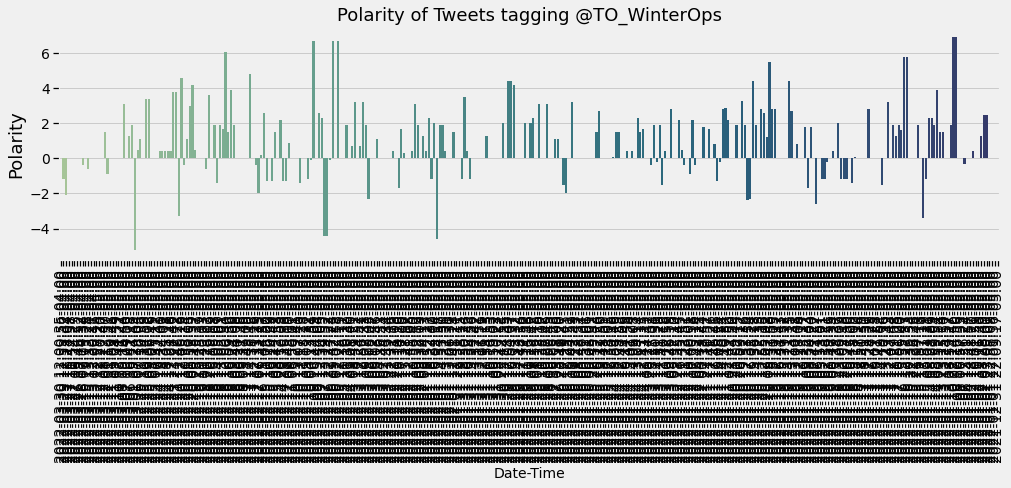

In [249]:
from matplotlib.dates import DateFormatter

#Visualization of tweet polarity over time
plt.figure(figsize=(15, 4))

plt.title('Polarity of Tweets tagging @TO_WinterOps', fontsize=18)
ax = sns.barplot(data=mentions_df, x='datetime_est', y='polarity',palette="crest")

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=14)
ax.set_ylabel('Polarity', fontsize=18)
#date_form = DateFormatter("%m-%d")

plt.xticks(rotation = 90)
plt.show()

## Get list of tweets from the @TO_WinterOps account

In [253]:
# we will be using the user_time API to get all tweets from the @TO_WinterOps account from Jan-March
userID = 'TO_WinterOps'

# Authorize our Twitter credentials
tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False,
                           tweet_mode = 'extended' #will include the full tweet text
                           )

In [254]:
#similar to earlier, to download more historic tweets, not just the last 200 (API limit for user_limit)
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id #the earliest id is extracted, which will be used to compare in the loop

while True:
    tweets = api.user_timeline(screen_name=userID, 
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1, #generate a new latest id based on previous API call
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('Number of tweets downloaded {}'.format(len(all_tweets)))

Number of tweets downloaded 319
Number of tweets downloaded 459
Number of tweets downloaded 623
Number of tweets downloaded 811
Number of tweets downloaded 976
Number of tweets downloaded 1142
Number of tweets downloaded 1292
Number of tweets downloaded 1485
Number of tweets downloaded 1682
Number of tweets downloaded 1862
Number of tweets downloaded 1886


In [257]:
# print out the latest 5 tweets
for info in all_tweets[:5]:
    print("ID: {}".format(info.id))
    print(info.created_at)
    print(info.full_text)
    print(info.entities)
    print(info.user.screen_name)
    print(info.user.id)
    print("\n")

ID: 1510379455432245248
2022-04-02 22:11:38+00:00
Liquid salt brine is being applied to Hills, bridges and roads throughout the City.  #CityofTOWinterAlert @311Toronto
{'hashtags': [{'text': 'CityofTOWinterAlert', 'indices': [85, 105]}], 'symbols': [], 'user_mentions': [{'screen_name': '311Toronto', 'name': '311 Toronto', 'id': 24201621, 'id_str': '24201621', 'indices': [106, 117]}], 'urls': []}
TO_WinterOps
2319261674


ID: 1509191830394609674
2022-03-30 15:32:26+00:00
Expressways, major roads, residential roads and trails are being salted where required.  #CityofTOWinterAlert @311Toronto
{'hashtags': [{'text': 'CityofTOWinterAlert', 'indices': [89, 109]}], 'symbols': [], 'user_mentions': [{'screen_name': '311Toronto', 'name': '311 Toronto', 'id': 24201621, 'id_str': '24201621', 'indices': [110, 121]}], 'urls': []}
TO_WinterOps
2319261674


ID: 1509001347986821121
2022-03-30 02:55:31+00:00
Liquid salt brine is being applied to expressways and major roads #CityofTOWinterAlert @311Toron

In [261]:
#same as earlier for mentions, generate a data frame from City tweets
TO_tweets = [[
              tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8"),
              tweet.entities,
              tweet.user.screen_name] 
             for idx,tweet in enumerate(all_tweets)]
to_tweets = DataFrame(TO_tweets ,columns=["id","created_at","favorite_count","retweet_count", "text", "entities","screen_name"])
to_tweets.head()

,id,created_at,favorite_count,retweet_count,text,entities,screen_name
0,1510379455432245248,2022-04-02 22:11:38+00:00,1,1,"Liquid salt brine is being applied to Hills, b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
1,1509191830394609674,2022-03-30 15:32:26+00:00,3,1,"Expressways, major roads, residential roads an...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
2,1509001347986821121,2022-03-30 02:55:31+00:00,5,0,Liquid salt brine is being applied to expressw...,"{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
3,1508072929841528836,2022-03-27 13:26:19+00:00,8,5,"All expressways, main roads and bikeways are b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
4,1503870532986589186,2022-03-15 23:07:30+00:00,4,2,"Winter operations are ongoing. Road salting, c...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps


In [262]:
#to follow along with the code, the dataframe will be saved to a separate file to_tweets.csv
to_tweets.to_csv('src/Twitter Data/to_tweets.csv')

to_tweets = pd.read_csv('src/Twitter Data/to_tweets.csv')
to_tweets.head()

,Unnamed: 0,id,created_at,favorite_count,retweet_count,text,entities,screen_name
0,0,1510379455432245248,2022-04-02 22:11:38+00:00,1,1,"Liquid salt brine is being applied to Hills, b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
1,1,1509191830394609674,2022-03-30 15:32:26+00:00,3,1,"Expressways, major roads, residential roads an...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
2,2,1509001347986821121,2022-03-30 02:55:31+00:00,5,0,Liquid salt brine is being applied to expressw...,"{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
3,3,1508072929841528836,2022-03-27 13:26:19+00:00,8,5,"All expressways, main roads and bikeways are b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps
4,4,1503870532986589186,2022-03-15 23:07:30+00:00,4,2,"Winter operations are ongoing. Road salting, c...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps


In [264]:
to_tweets['datetime_utc'] = pd.to_datetime(to_tweets['created_at'],utc=True)
to_tweets['datetime_est'] = to_tweets['datetime_utc'].dt.tz_convert('US/Eastern')
to_tweets.head()

,Unnamed: 0,id,created_at,favorite_count,retweet_count,text,entities,screen_name,datetime_utc,datetime_est
0,0,1510379455432245248,2022-04-02 22:11:38+00:00,1,1,"Liquid salt brine is being applied to Hills, b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps,2022-04-02 22:11:38+00:00,2022-04-02 18:11:38-04:00
1,1,1509191830394609674,2022-03-30 15:32:26+00:00,3,1,"Expressways, major roads, residential roads an...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps,2022-03-30 15:32:26+00:00,2022-03-30 11:32:26-04:00
2,2,1509001347986821121,2022-03-30 02:55:31+00:00,5,0,Liquid salt brine is being applied to expressw...,"{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps,2022-03-30 02:55:31+00:00,2022-03-29 22:55:31-04:00
3,3,1508072929841528836,2022-03-27 13:26:19+00:00,8,5,"All expressways, main roads and bikeways are b...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps,2022-03-27 13:26:19+00:00,2022-03-27 09:26:19-04:00
4,4,1503870532986589186,2022-03-15 23:07:30+00:00,4,2,"Winter operations are ongoing. Road salting, c...","{'hashtags': [{'text': 'CityofTOWinterAlert', ...",TO_WinterOps,2022-03-15 23:07:30+00:00,2022-03-15 19:07:30-04:00


In [265]:
to_tweets.to_csv('to_tweets_final.csv')